# Assignment 11: Mathematical modelling - final practice
## Learning goals 
This homework includes some repeated task and variations on model fitting, and model comparision, which should prepare you optimally for the final. Try to solve the task in the homework independently, and prepare a cheat-sheet and a file with useful functions, such that you can complete this homework in 3 hrs or less. 

## Data set 
The file babies.csv contains data from the Child Health and Development Studies, which investigate a range of topics. One study considered all pregnancies between 1960 and 1967 among women in the Kaiser Foundation Health Plan in the San Francisco East Bay area. Here, we look at the predictor of birth weight of babies, measured in ounces, as well as the occurence of complications in the first 3 month. 

The data frame stored in babies.csv contains the variables: 
- case:       Case number
- gestation:    Gestation period (length of pregnancy) [days]
- parity:        1: child the first born 0: Child has older siblings 
- age:           Age of the mom at time of birth
- height:       Height of the baby [cm].
- Weight:        Weight of the baby [ounces].  
- smoke:        Is the mom a smoker / non-smoker? 
- hospital:     Which hospital was the birth at? Oakland, SanFrancisco, WalnutCreek, SanJose, and Richmond.
- complication: Was there a complication within the first 3 month of pregnancy (0: No 1:Yes) 

## Preliminaries
Set up the environment by importing pandas, seaborn, numpy, scipy.optimize and matplotlib. Because we are using plots make sure that you configure your notebook such that plots are shown inline (see Assignment 2). 

In [1]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.optimize as so
import seaborn as sns
import pandas as pd 
import numpy as np

## Task 1: Multiple regression with discrete variables ( / 36 pts)
### Question 1 ( / 10pt)
Create a dummy variable for Smoker / Non-smoker. Set the value for “Smoker” to 1 and for “Non-smoker” to 0. Estimate a regression model with the dummy variable as a regressor <font color = 'red'> and birth weight as the response variable.<font color = 'black'> Report the value of the intercept and slope. What does the intercept and slope value indicate? 


In [2]:
def multRegPredict(b,D,xname):
    yp=np.ones(len(D.index))*b[0]        # Intercept 
    for i in range(len(xname)):          
        yp=yp+D[xname[i]]*b[i+1]         # Add each regression value 
    return yp 

def multRegLossRSS(b,D,y,xname):
    predY = multRegPredict(b,D,xname)
    res = y-predY
    rss = sum(res**2)
    grad=np.zeros(len(b))
    grad[0]=-2*np.sum(res)
    for i in range(len(xname)):
        grad[i+1]=-2*np.sum(D[xname[i]]*res)
    return (rss,grad)

def multRegFit(D,y,xname,figure=0,b0=[]):
    k=len(xname)+1
    if (len(b0)!=k):
        b0=np.zeros((k,1))
    RES = so.minimize(multRegLossRSS,b0,args=(D,y,xname),jac=True)
    b=RES.x # Results
    res = y-np.mean(y)
    TSS = sum(res**2)
    RSS,deriv = multRegLossRSS(b,D,y,xname)
    R2 = 1-RSS/TSS 
    if (k==2 and figure==1):
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.scatter(D[xname[0]],y)
        xRange=[min(D[xname[0]]),max(D[xname[0]])]
        xp=np.arange(xRange[0],xRange[1],(xRange[1]-xRange[0])/50)
        yp=b[0]+b[1]*xp
        ax.plot(xp,yp,'r-')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    return (R2,b)

In [3]:
D = pd.read_csv('babies.csv')

In [4]:
D['smokeDummy'] = np.double(D['smoke'] == 'Smoker')

The intercept is 129.3086592178771 
The slope is -2.4331133663486995 


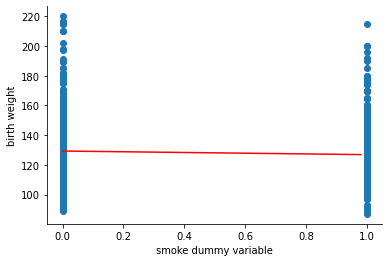

In [5]:
r2, b = multRegFit(D,D['weight'],['smokeDummy'],figure=1,b0=[])
plt.xlabel('smoke dummy variable')
plt.ylabel('birth weight')
print('The intercept is %s ' % b[0])
print('The slope is %s ' % b[1])

*Figure 1*. Shows the scatter plot of birth weight of babies with smoking mothers (1) and non-smoking moms (0). The red line is the regression line.

> b0 (the intercept) is the mean of the non-smoking group (y = b[0] + b[1] * 0) and b[1] is the difference between the means of smokers and non-smokers (y = b[0] + b[1] * 1). Since b[1] is a negative value, the mean birth weight of babies of smoker group is lower than the mean of the smoker group.

### Question 2 ( / 5pt)
Make a boxplot of hospital on the x-axis and birthweight on the y-axis (see HW2 for an example). Which hospital has the lowest overall birth weight?  

/Users/oren/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hospital', ylabel='weight'>

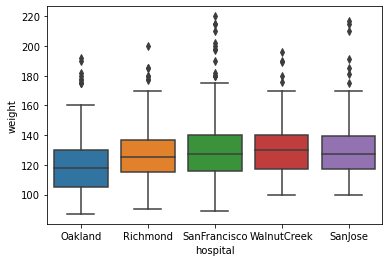

In [6]:
sns.boxplot(D.hospital,D.weight)

*Figure 2*. Boxplot of birth weight of babies grouped by the hospital

> Oakland has the lowest average (and median) birth weight. 

### Question 3  ( / 7pt)
Create a set of 4 dummy variables that together code the hospital. Set Walnut Creek to be your comparison group. Run a multiple regression model with the 4 dummy variables as explanatory variables. Report the interecept and slope values. What do the intercept and slope values mean? 

In [7]:
D['hospOAK'] = np.double(D.hospital=='Oakland')
D['hospSFO'] = np.double(D.hospital=='SanFrancisco')
D['hospSJO'] = np.double(D.hospital=='SanJose')
D['hospRIM'] = np.double(D.hospital=='Richmond')

In [8]:
r2,b=multRegFit(D,D.weight,['hospOAK','hospSFO','hospSJO','hospRIM'])
print("B:{0:3.3f}".format(b[0]))
print("B:{0:3.3f}".format(b[1]))
print("B:{0:3.3f}".format(b[2]))
print("B:{0:3.3f}".format(b[3]))
print("B:{0:3.3f}".format(b[4]))

B:130.984
B:-10.002
B:-0.100
B:0.483
B:-3.292


> The incept is 130.9, which is the average weight for WalnutCreek<br> 
The slope for Oakland is -10, which means that the birth weight of babies in Oakland is 10oz lower than in WC <br>
The slope for SFO is -0.09, which means that the birth weight of babies in SF is only 0.09 oz lower than in WC<br>
The slope for SJO is 0.48, which means that the birth weight of babies in San Jose is  0.48 oz higher than in WC<br>
The slope for Richmond is -3.29, which means that the birth weight of babies in SF is only 3.29 oz lower than in WC<br>

### Question 4 ( / 7 pts)
Use your bootstrap routine (HW10) on the multiple regression model of Q3 to get 500 bootstrap samples. The difference between the average birth weight between Oakland and SanJose hospitals can be calculated as a difference between the corresponding slope parameters. Report the 95% Confidences interval for the difference. Use the confidence interval to see if the difference significant at the p=0.05 level. 

In [9]:
def bootstrapReg(D,y,args,fitfcn,numIter=1000):
    r2, b=fitfcn(D,y,args)
    numParams=len(b)
    N = len(D.index) # number of data points
    ind  = np.arange(N) # a numpy array containing the indices
    stats = np.zeros((numIter,numParams)) # preallocating the np array for parameters (each column will be the distribution for a parameter)
    for i in range(numIter):
        sample = np.random.choice(ind,N) # sampling with replacement
        r2 , stats[i, :]=fitfcn(D.iloc[sample],y[sample],args)
    return stats

def confidenceInt(data,perc):
    Int=(np.percentile(data,(100-perc)/2),np.percentile(data,100-(100-perc)/2))
    return Int

In [10]:
params = bootstrapReg(D,D['weight'],['hospOAK','hospSFO','hospSJO','hospRIM'],multRegFit,numIter=500)

In [11]:
bwOAK = params[:, 1] # getting the distribution for birth weight in oakland
bwSJO = params[:, 3] # getting the distribution for birth weight in San Jose

bwDif = bwOAK - bwSJO; # distribution for the difference

ci = confidenceInt(bwDif,95)
print('the lower bound of the confidence interval is %s' % ci[0])
print('the upper bound of the confidence interval is %s' % ci[1])



the lower bound of the confidence interval is -15.471571989518832
the upper bound of the confidence interval is -5.872411127217564


> The CI does not include zero. That means that we can reject the Null-hypothesis that the average birth weights are equal in both hospital with a Type I error of p < 5%.  

### Question 5 ( / 7 pts)
Run a regression analysis of the weight (response variable) as a function of whether the birth occurred at the Oakland hospital as opposed to any other of the other hospitals. To do this, only include a dummy coded variable which is 1 for the Oakland hospital and zero for the others. What does the slope value for this variable indicate?

array([129.98544699,  -9.00431491])

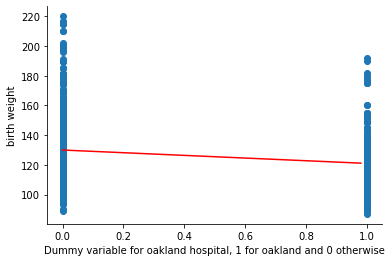

In [12]:
R2,b=multRegFit(D,D.weight,['hospOAK'],figure=1)
plt.xlabel('Dummy variable for oakland hospital, 1 for oakland and 0 otherwise')
plt.ylabel('birth weight')
b

*Figure 3*. Shows the scatter for birth weight of two population groups with the linear regression line polotted in red

> The slope is -9.0 ,which indicates a average birth weight difference between kids born in the Oakland hospital vs. other hospitals. 

## Task 2: Model selection for multiple regression  ( / 30 pts)
### Question 1 ( / 18 pts)
Write a version of the crossvalidation function that does K-fold crossvalidation and works specifically with multRegFit as the fitting function. 

KfoldCVmultReg(D,y,args=(),K=20,fitfcn=multRegFit,predictfcn=multRegPredict):
- D: Data Frame with explanatory variables  
- y: response variable 
- args: List of arguments given to the fitting function: This is normally a list of xnames 
- K: Number of crossvalidation folds 
- fitfcn: Funtion used for fitting 
- predictfcn: Function used fro predicting 

The code should compute and return the crossvalidated R2 and the fitted R2. 
Run 20-fold crossvalidation on the multiple regression model, with birth weight as the response variable and 

- age of the mother 
- smoker (dummy coded) 
- birth occurred in Oakland? 
- gestation 

as explanatory variables. 
Report R2cv and R2. 

In [13]:
def KfoldCVmultReg(D,y,args=(),K=20,fitfcn=multRegFit,predictfcn=multRegPredict):
    N = len(y) #Number of observations
    yp= np.zeros(N)
    ind = np.arange(N)
    ind = np.floor(ind/N*K)
    
    # Get overall model fit 
    R2,b_all=fitfcn(D,y,args)

    # Loop over the crossvalidation folds 
    for i in range(K):
        r,b=fitfcn(D[ind!=i],y[ind!=i],args,b0=b_all,figure=0)
        yp[ind==i]=predictfcn(b,D[ind==i],args)
        
    # Calculate crossvalidated model fit 
    TSS  = sum((y-y.mean())**2)
    RSScv = sum((y-yp)**2)
    R2cv = 1-RSScv/TSS
    return R2cv,R2 

In [14]:
KfoldCVmultReg(D,D.weight,['age','smokeDummy','hospOAK','gestation'])

(0.03382170220563052, 0.047744007589578086)

> R2 is 0.477, and cv R2 is 0.033. So overall, we are able to only predict 3.3% of the variance 

### Question 2 ( / 12 pts)
Using the R2cv from the 20-fold crossvalidation, determine the best predictive model for birthweight using the following candidate variables 

- age of mom
- smoker (dummy coded) 
- birth occurred in Oakland? 
- gestation 

Start with the R2cv for the full model (Question 1)and use backwards step-wise regression to find the best model (the model that increases R2cv the most). Show all steps of your selection procedure. Report the formula of your best model. 

In [15]:
KfoldCVmultReg(D,D.weight,['smokeDummy','hospOAK','gestation'])

(0.01897679751401382, 0.031189259722306018)

In [16]:
KfoldCVmultReg(D,D.weight,['age','hospOAK','gestation'])

(0.03289000306090084, 0.04619836609449535)

In [17]:
KfoldCVmultReg(D,D.weight,['age','smokeDummy','gestation'])

(0.015467316507549511, 0.02237616527402031)

In [18]:
KfoldCVmultReg(D,D.weight,['age','smokeDummy','hospOAK'])

(0.03531962896197227, 0.04749979322344988)

> The R2cv only increases when dropping gestation from the model. So we drop this variable and proceed with trying to drop another variable. 

In [19]:
KfoldCVmultReg(D,D.weight,['smokeDummy','hospOAK'])

(0.02076634832531976, 0.031126314750102524)

In [20]:
KfoldCVmultReg(D,D.weight,['age','hospOAK'])

(0.03437292634592415, 0.04587286452834338)

In [21]:
KfoldCVmultReg(D,D.weight,['age','smokeDummy'])

(0.01649009937355439, 0.021619402754245898)

> Dropping any further variable leads to a decreae of the R2cv, so the final model is  

> weight = b0 + b1 \*age + b2 \* smokeDummy +  b2 \*hospOAK

## Task 3: Logistic regression model to predict complications ( / 34 pts)
In this task you will create and test a logistic regression model that predicts the presence of a complication in the first three month (0: no complication, 1: complication). 
### Question 1: Improving your logistic regression model code ( / 10 pt) 
Improve your code for logisitic regression in two ways: 

1. prevent log(0) errors by making sure that your predicted value never is smaller than 1e-20 or larger than 1-1e-20. 

2. Let logisticRegFit take an additional input parameter, telling it whether it should plot a figure or not (figure=1) 

3. Let logisticRegFit take an additional input parameter, specifying the starting value for the parameters (b0=[]). If b0 is empty, the function should start with a vector off all zeros. 

In [22]:
def logisticRegPredict(b,D,xname):
    yp=np.ones(len(D.index))*b[0]       # Start out with the intercept  
    for i in range(len(xname)):
        yp=yp+D[xname[i]]*b[i+1]        # Add the prediction of each regressor seperately 
    p = np.exp(yp)/(1+np.exp(yp))
    p[p<1e-12]=1e-12 #making sure predicted value is never small than 1e-20 or larger than 1-1e-20
    p[p>(1-(1e-12))]=1-(1e-12)
    return p 
    
def logisticRegLoss(b,D,y,xname):
    p = logisticRegPredict(b,D,xname)
    cost = -y*np.log(p)-(1-y)*np.log(1-p)
    N=len(xname)
    grad=np.zeros(N+1)
    res = y-p
    grad[0]=-sum(res)
    for i in range(N):
        grad[i+1]=-np.sum(D[xname[i]]*res)         # Add each regressor 
    return (cost.sum(),grad)
    
def logisticRegFit(D,y,xname,figure=0,b0=[]):
    k=len(xname)+1
    if (len(b0)!=k):
        b0=np.zeros(k)
    RES = so.minimize(logisticRegLoss,b0,args=(D,y,xname),jac=True)
    b = RES.x
    ll = -RES.fun # Negative function value is the log likelihood 
    p = logisticRegPredict(b,D,xname)
    if (k==2 & figure==1):
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.scatter(D[xname[0]],y)
        xRange=[min(D[xname[0]]),max(D[xname[0]])]
        xp=np.arange(xRange[0],xRange[1],(xRange[1]-xRange[0])/50)
        yp=b[0]+b[1]*xp
        pp=np.exp(yp)/(1+np.exp(yp))
        ax.plot(xp,pp,'r-')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    return (ll,b)

### Question 2: Crossvalidation of logistic models ( / 10 pts) 
Modify the KfoldCVmultReg function to make it work for logistic regression. As before, use K-fold crossvalidation. The main changes are that 
- you need to use logisticRegFit and logisticRegPredict as fitfcn and predictfcn respectively. 
- instead of the crossvalidated R2, your function should return the crossvalidated log-likelihood and non-crossvalidated log-likelihood. 

Using your function, calculate the the difference in crossvalidated log-likelihood for the model that predicts complications with an intercept only (b0) and a model that predicts complications with an intercept and smokeDummy. 
From the difference, report the Bayes-Factor between the two models. What do you conclude? 

In [23]:
def KfoldCVlogisticReg(D,y,args=(),K=20,fitfcn=logisticRegFit,predictfcn=logisticRegPredict):
    N = len(y) #Number of observations
    yp= np.zeros(N)
    ind = np.arange(N)
    ind = np.floor(ind/N*K)
    
    # Get overall model fit 
    LL,b_all=fitfcn(D,y,args)
    
    # Loop over the crossvalidation folds 
    for i in range(K):
        r,b=fitfcn(D[ind!=i],y[ind!=i],args,b0=b_all,figure=0)
        yp[ind==i]=predictfcn(b,D[ind==i],args)
    LLcv = sum(y*np.log(yp)+(1-y)*np.log(1-yp))
    return LLcv,LL 

In [24]:
D=pd.read_csv('babies.csv')
D['smokeDummy'] = np.double(D.smoke=='Smoker')
llcv0,ll0=KfoldCVlogisticReg(D,D.complication,[])
llcv1,ll1=KfoldCVlogisticReg(D,D.complication,['smokeDummy'])
llcv1-llcv0

1.0991270013042822

In [31]:
llcv1

-648.2076422401493

In [32]:
llcv0

-649.3067692414536

In [25]:
np.exp(llcv1-llcv0)

3.0015445353703543

> There is just about positive evidence that smoking leads to increased chance of complications in the first 3 month.  

### Question 3 ( / 7 pts):
Compare the model that uses only smoking (and intercept) as explanatory variable to one that uses additionally (to intercept and smoking) the weight of the baby at birth, age of the mom, or both. Calculate crossvalidated Log-likelihood, which one is the best model? 

In [26]:
llcv2,ll2=KfoldCVlogisticReg(D,D.complication,['smokeDummy','weight'])
llcv2-llcv1

2.332767026838951

In [27]:
llcv2,ll2=KfoldCVlogisticReg(D,D.complication,['smokeDummy','age'])
llcv2-llcv1

-0.3726609463732302

In [28]:
llcv2,ll2=KfoldCVlogisticReg(D,D.complication,['smokeDummy','weight','age'])
llcv2-llcv1

1.807190223000248

> According to the crossvalidated likelihood, the model with smoking and weight is the best model. Adding age into the model does not seem to increase the prediction.  

### Question 4 ( / 7 pts): 
In the model (['smokeDummy','weight']), how do each of the explanatory variables contribute to the chance of complication? That is, for each variable, would an increase an the variable lead to an increased or decreased probability of a complication? In terms of risk of complications, how many oz of weight is equivalent to a smoking mother?  

In [29]:
ll,b=logisticRegFit(D,D.complication,['smokeDummy','weight'])
b

array([-0.06186291,  0.29967269, -0.00948856])

In [30]:
b[1]/b[2]

-31.582522157299405

> Smoking increases the chances of complication. Lower weight also increases the chances of complications. Smoking adds about as much risk at a lower birthweight of 31oz. 